In [27]:
import pandas as pd
import matplotlib.pyplot as plt


data = {}

def importData(filename):

    f = open(filename, "r")
    temperature = float(f.readline().strip("Temperature "))
    df = pd.read_csv(filename, skiprows=1)
    return temperature, df

for i in range(15):
    temperature, df = importData("output/temp_%s" % i)
    data[temperature] = df


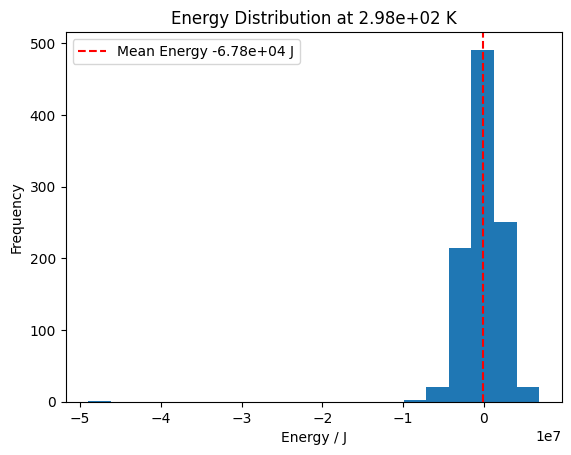

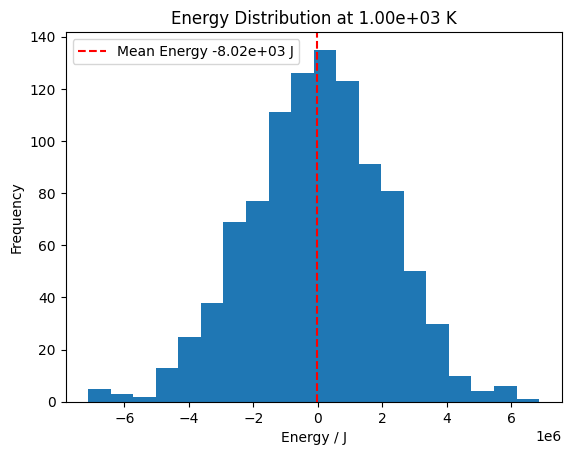

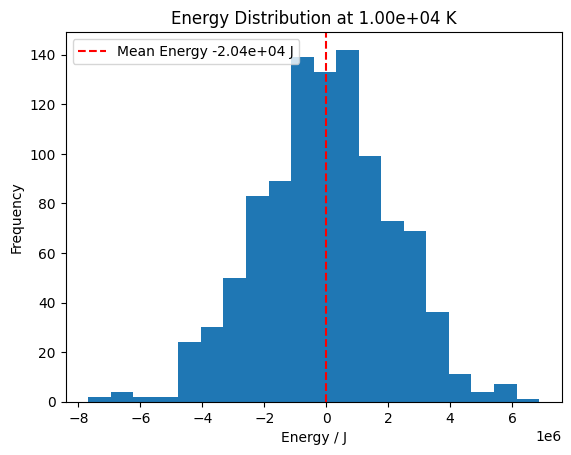

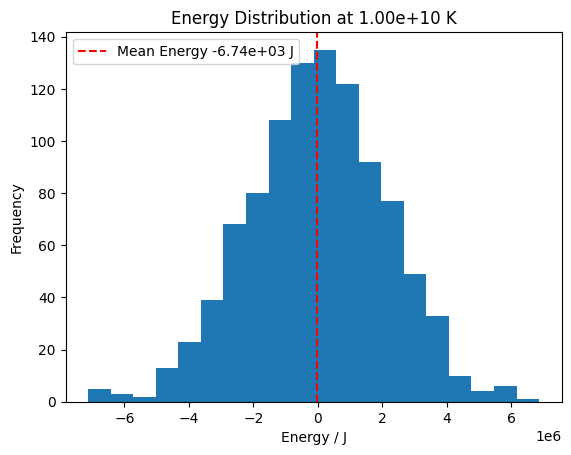

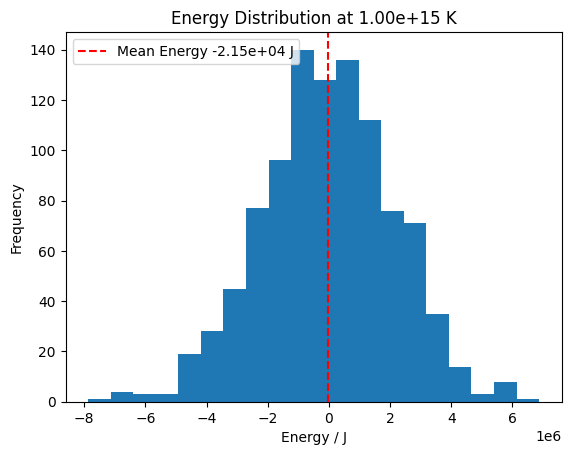

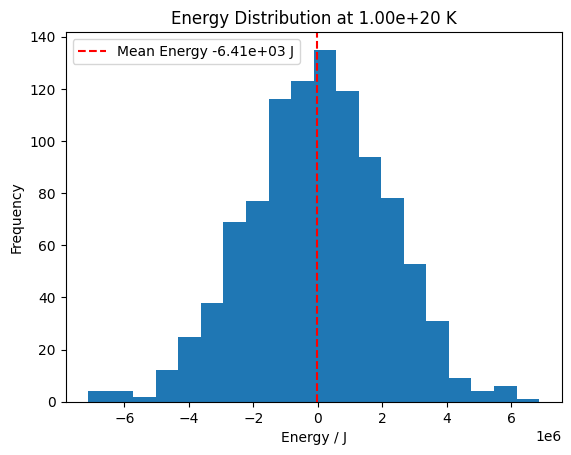

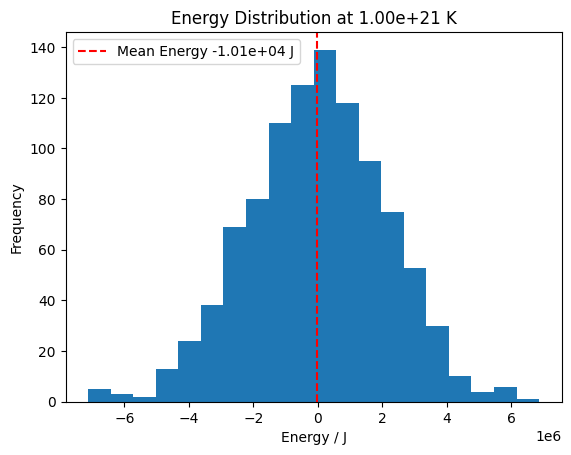

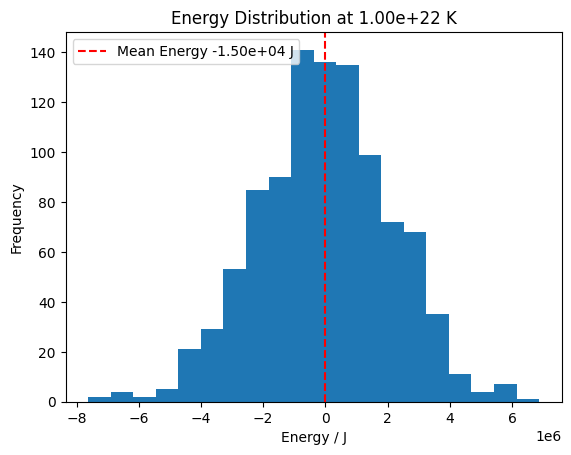

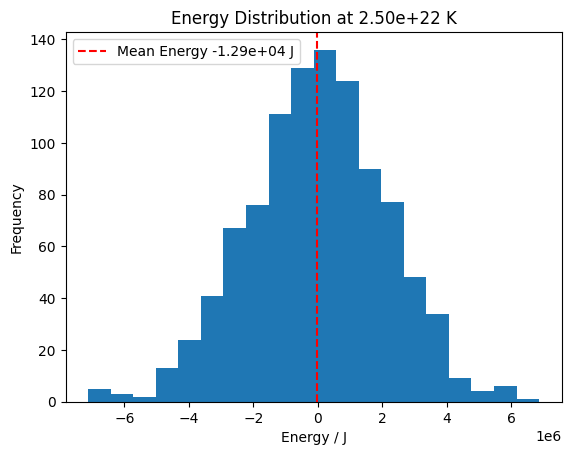

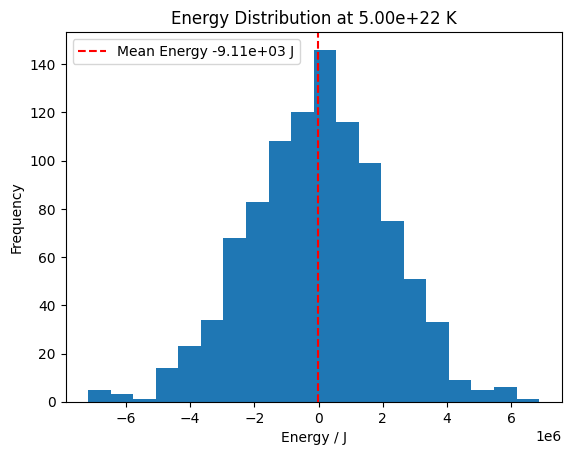

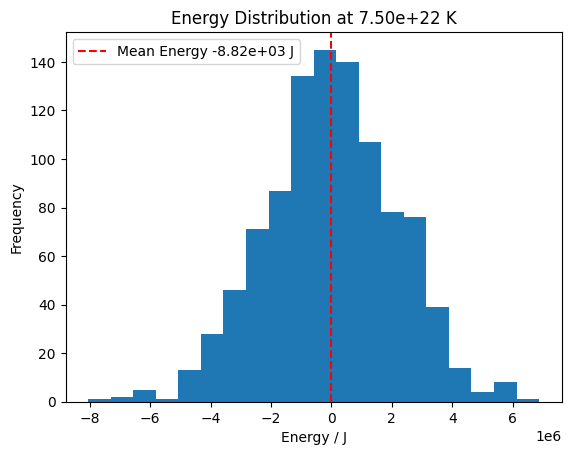

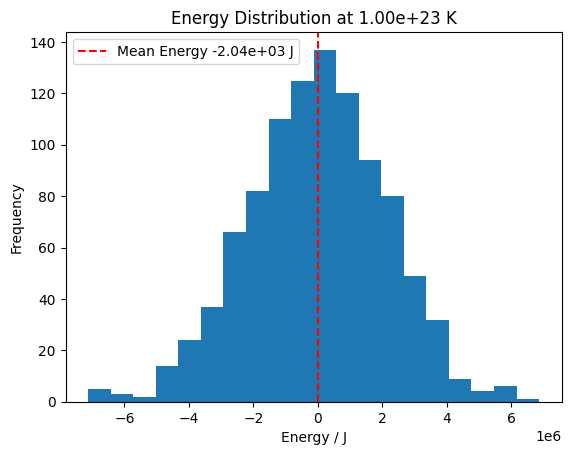

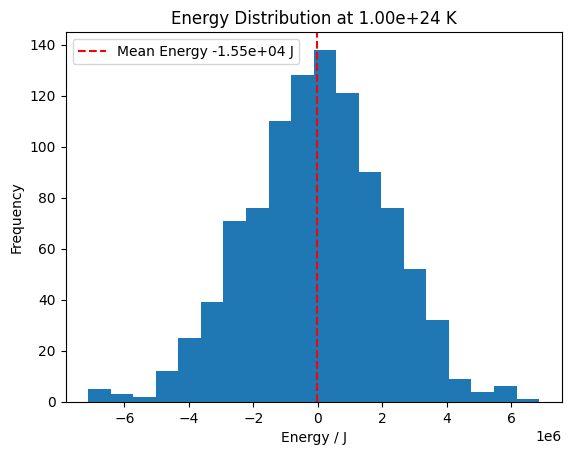

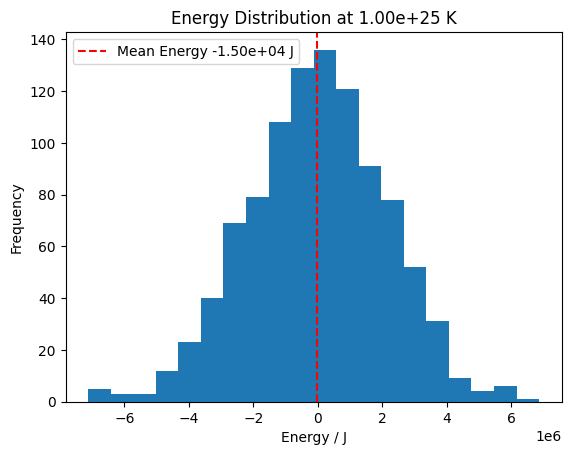

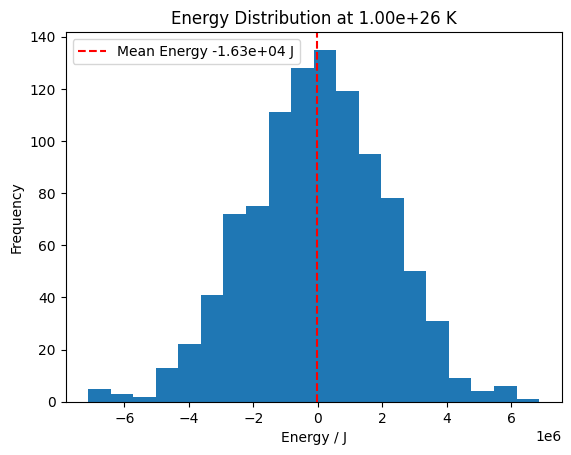

In [60]:
for temperature in data.keys():

    fig, ax = plt.subplots()
    df = data[temperature]
    ax.hist(df["energy"], bins=20)
    ax.set_title(f"Energy Distribution at %s K" % "{:.2e}".format(temperature))
    # ax.set_xlim(-10e6, 10e6)
    ax.axvline(df["energy"].mean(), color="red", linestyle="dashed", label=f"Mean Energy %s J" % "{:.2e}".format(df["energy"].mean()))
    ax.legend(loc="upper left")
    ax.set_ylabel("Frequency")
    ax.set_xlabel("Energy / J")
    # print(fig.get_size_inches())
    # ax.annotate(f"Mean Energy %s J" % "{:.2e}".format(df["energy"].mean()), (0.01, 0.9), xycoords="axes fraction")
    # print(df["energy"].mean())


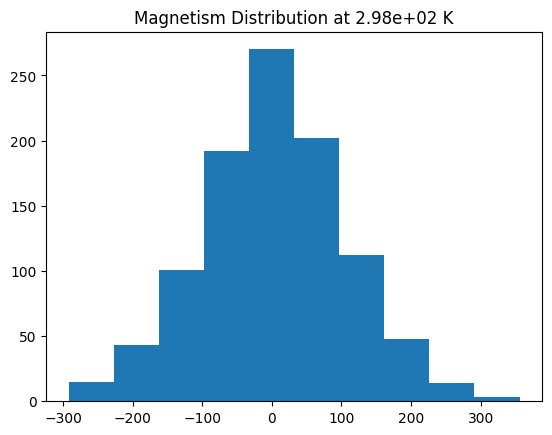

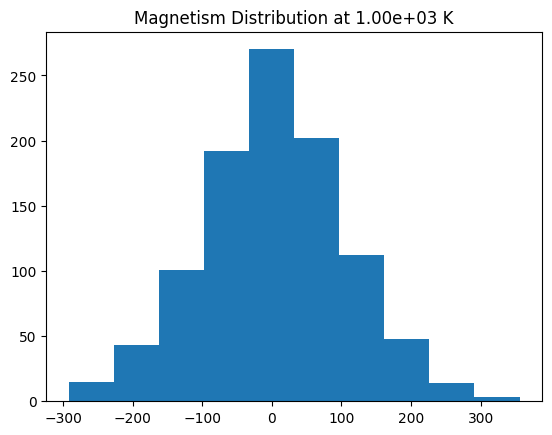

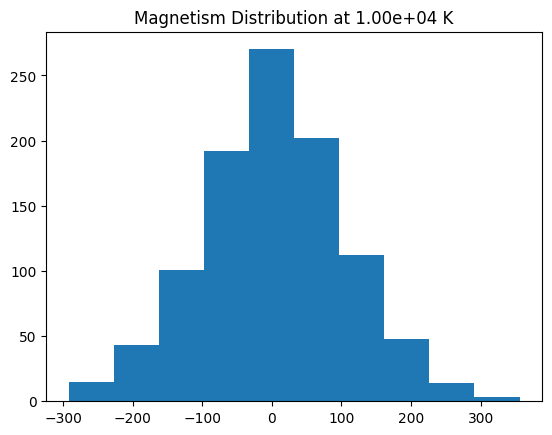

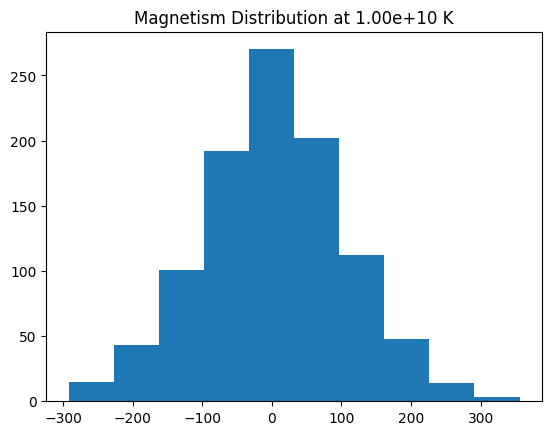

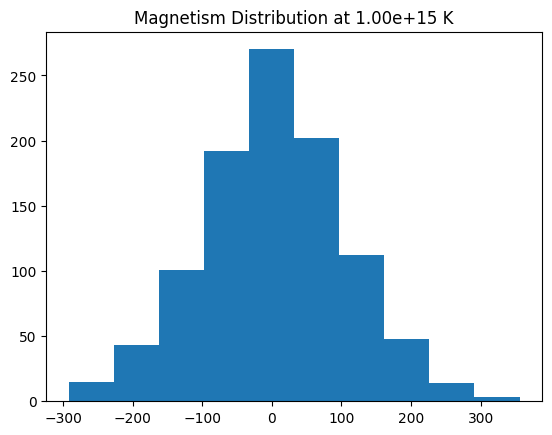

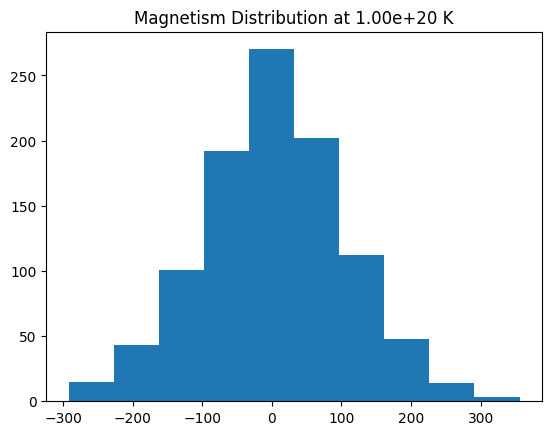

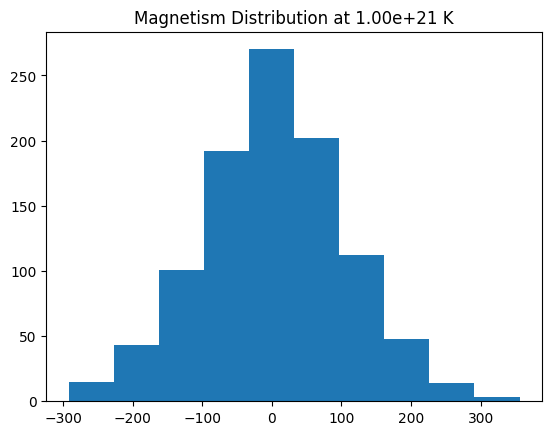

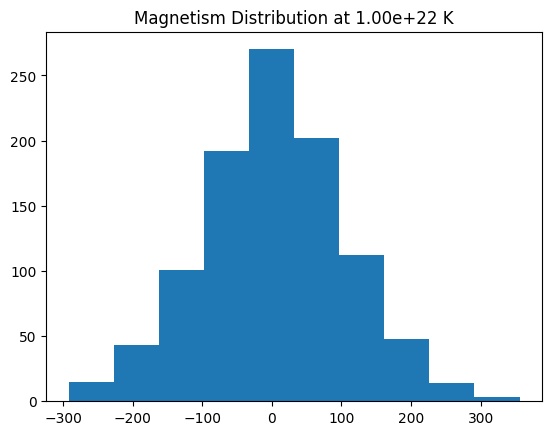

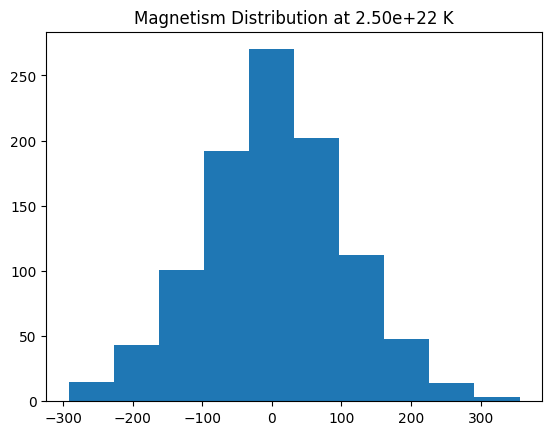

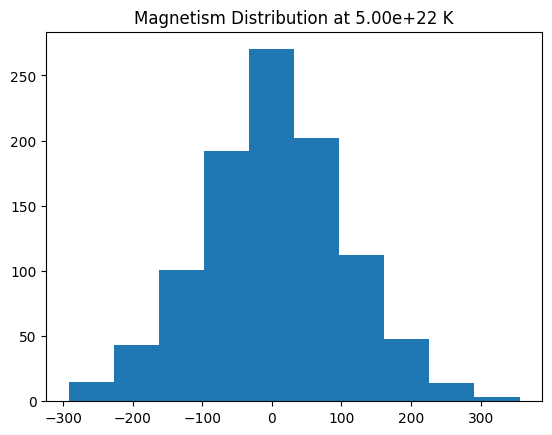

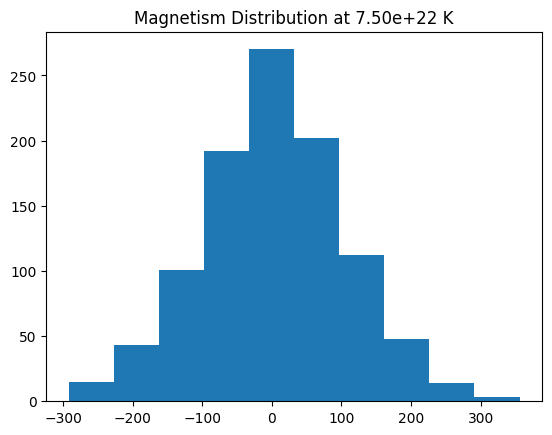

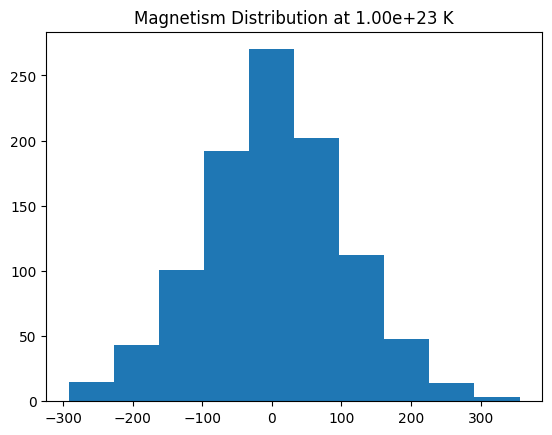

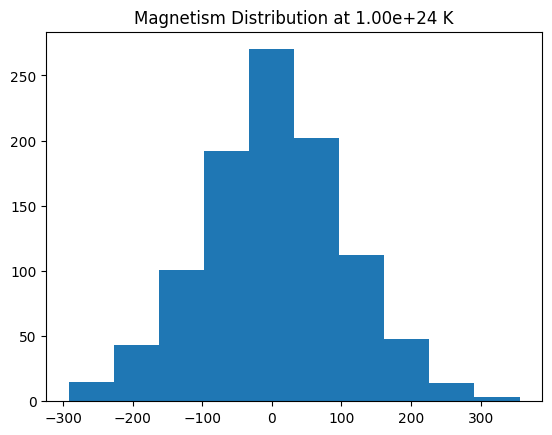

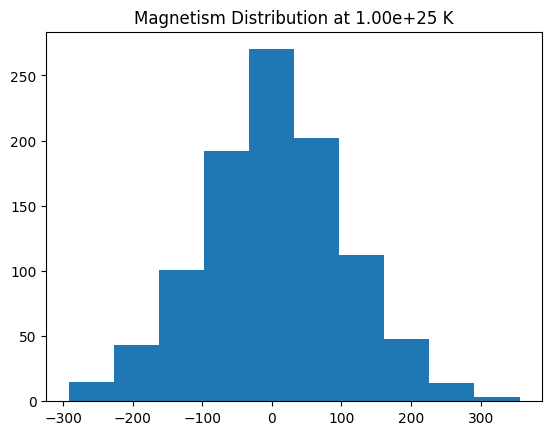

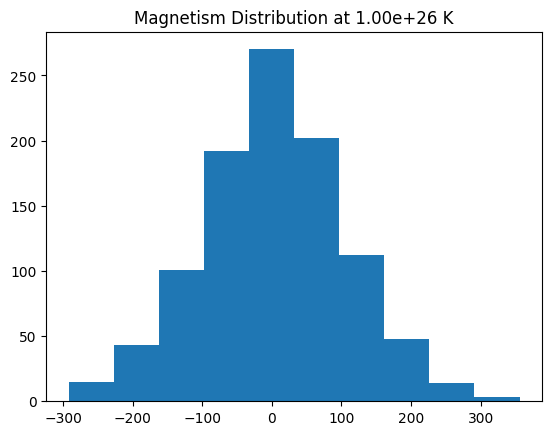

In [29]:
for temperature in data.keys():

    fig, ax = plt.subplots()
    df = data[temperature]
    ax.hist(df["magnetism"])
    ax.set_title(f"Magnetism Distribution at %s K" % "{:.2e}".format(temperature))

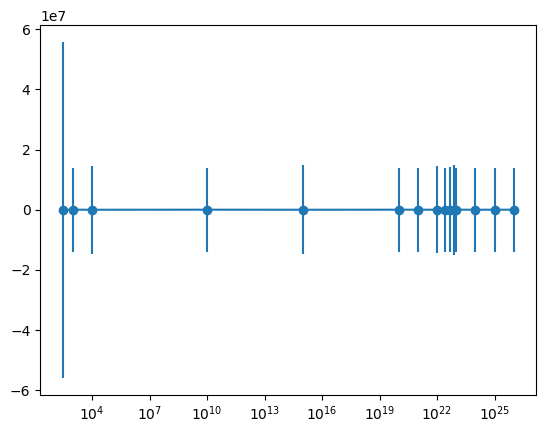

In [54]:
fig, ax = plt.subplots()

mean_energies = []
ranges = []

for temp in data.keys():
    mean_energies.append(data[temp]["energy"].mean())
    ranges.append(data[temp]["energy"].max()-data[temp]["energy"].min())


ax.errorbar(data.keys(), mean_energies, ranges)

ax.scatter(data.keys(), mean_energies)
ax.set_xscale("log")

# for xy in zip(data.keys(), mean_energies):
#     ax.annotate("%s %s" % xy, xy=xy)